In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jinhangjiang/Datasets/main/Network%20Data/emailEUcore/email-Eu-core.txt",delimiter = " ",names=["Source","Target"])
df.head()

Source  Target
0       0       1
1       2       3
2       2       4
3       5       6
4       5       7

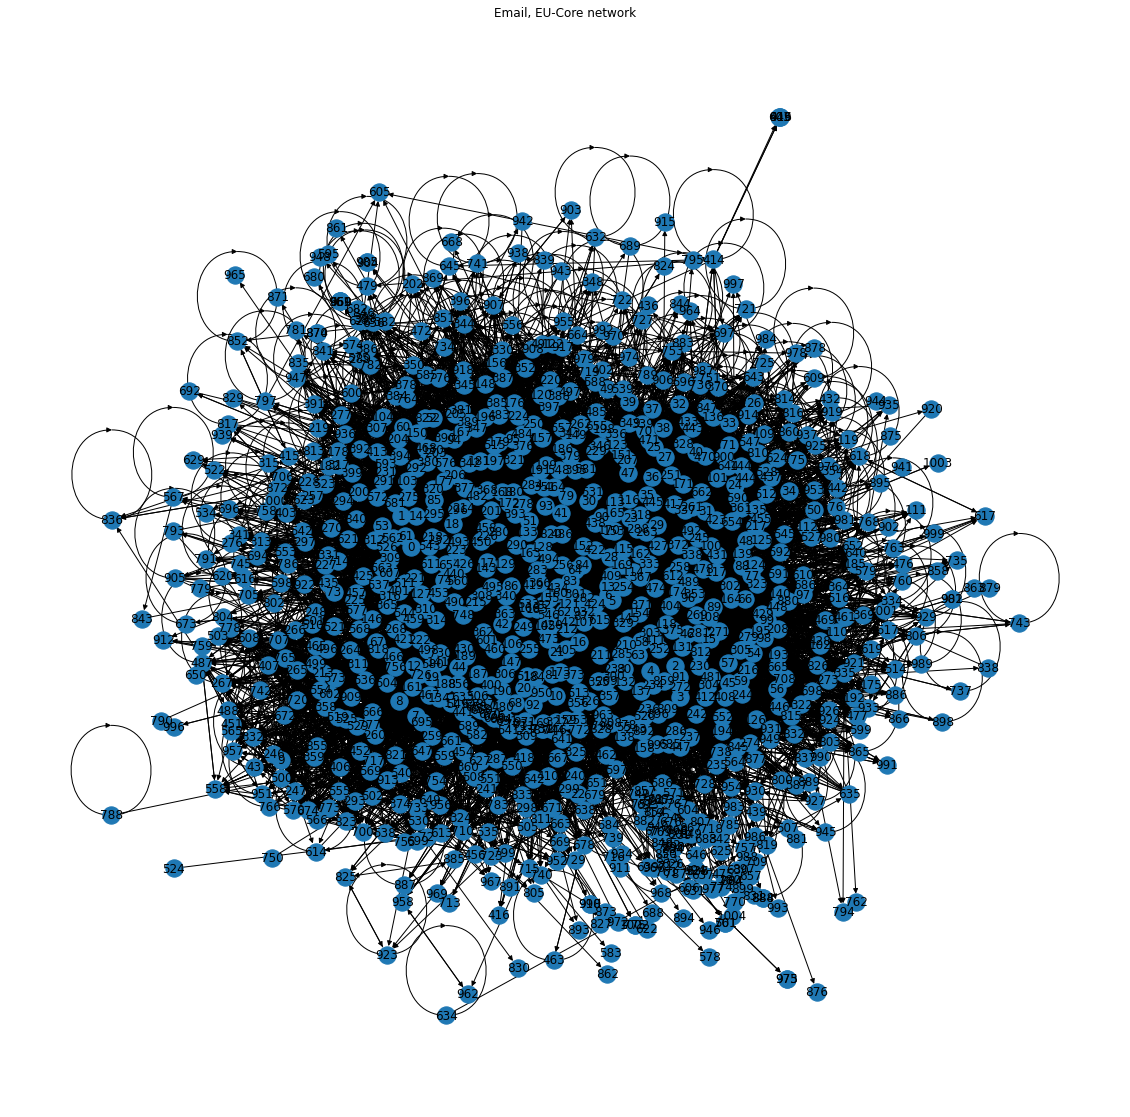

In [3]:
G = nx.from_pandas_edgelist(df, source='Source', target = 'Target', create_using=nx.DiGraph())
plt.subplots(figsize=(20,20))
plt.title('Email, EU-Core network')
nx.draw_kamada_kawai(G, with_labels=True)

In [4]:
student_sent_mails = list(df.groupby('Source')['Target'].count())
student_sent_mails.index(max(student_sent_mails))+1

160

In [5]:
# Degree centrality

In [6]:
degree_centrality = nx.algorithms.centrality.degree_centrality(G)
for i, w in enumerate(sorted(degree_centrality, key=degree_centrality.get, reverse=True)):
    if(i<10):
        print(w, degree_centrality[w])
    else:
        break

160 0.5438247011952191
121 0.37749003984063745
107 0.3715139442231076
62 0.36752988047808766
86 0.3545816733067729
82 0.34661354581673304
434 0.30677290836653387
183 0.300796812749004
5 0.2788844621513944
129 0.2739043824701195


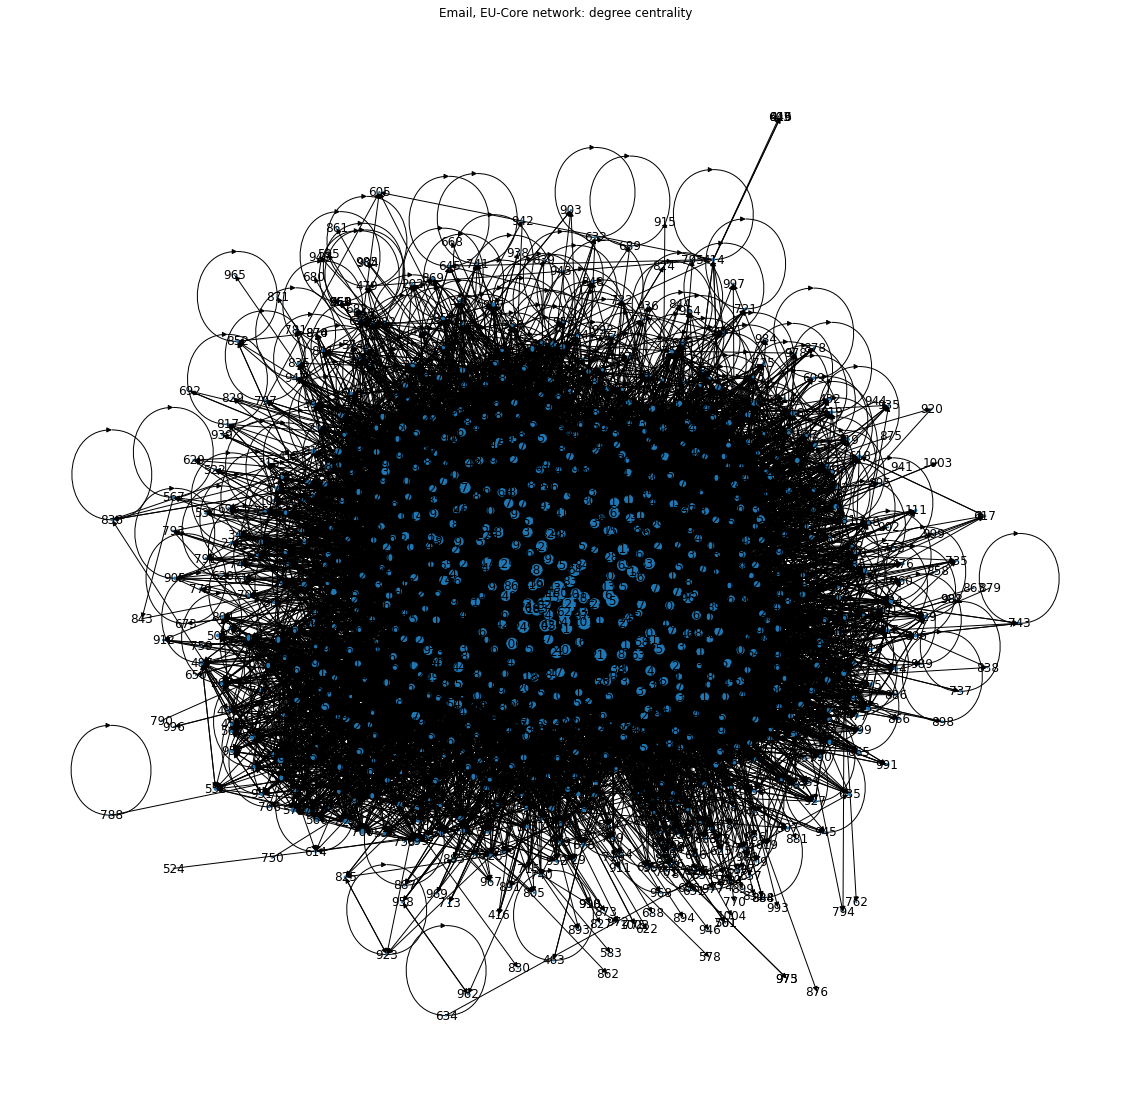

In [7]:
plt.subplots(figsize=(20,20))
plt.title('Email, EU-Core network: degree centrality')
nx.draw_kamada_kawai(G, with_labels=True, node_size=list(np.array(list(degree_centrality.values()))*500))

In [8]:
# Betweenness centrality

In [9]:
btw_centrality = nx.algorithms.centrality.betweenness_centrality(G)
for i, w in enumerate(sorted(btw_centrality.items(), key = lambda item:item[1], reverse = True)):
    if(i<10):
        print(w)
    else:
        break

(160, 0.07212078608028884)
(86, 0.037432912122184775)
(5, 0.026984804243671952)
(121, 0.024532102889508717)
(62, 0.02451110558180135)
(107, 0.02185778938072534)
(64, 0.01866532308007618)
(82, 0.018229609890582157)
(377, 0.016220465196907407)
(129, 0.015569466534401019)


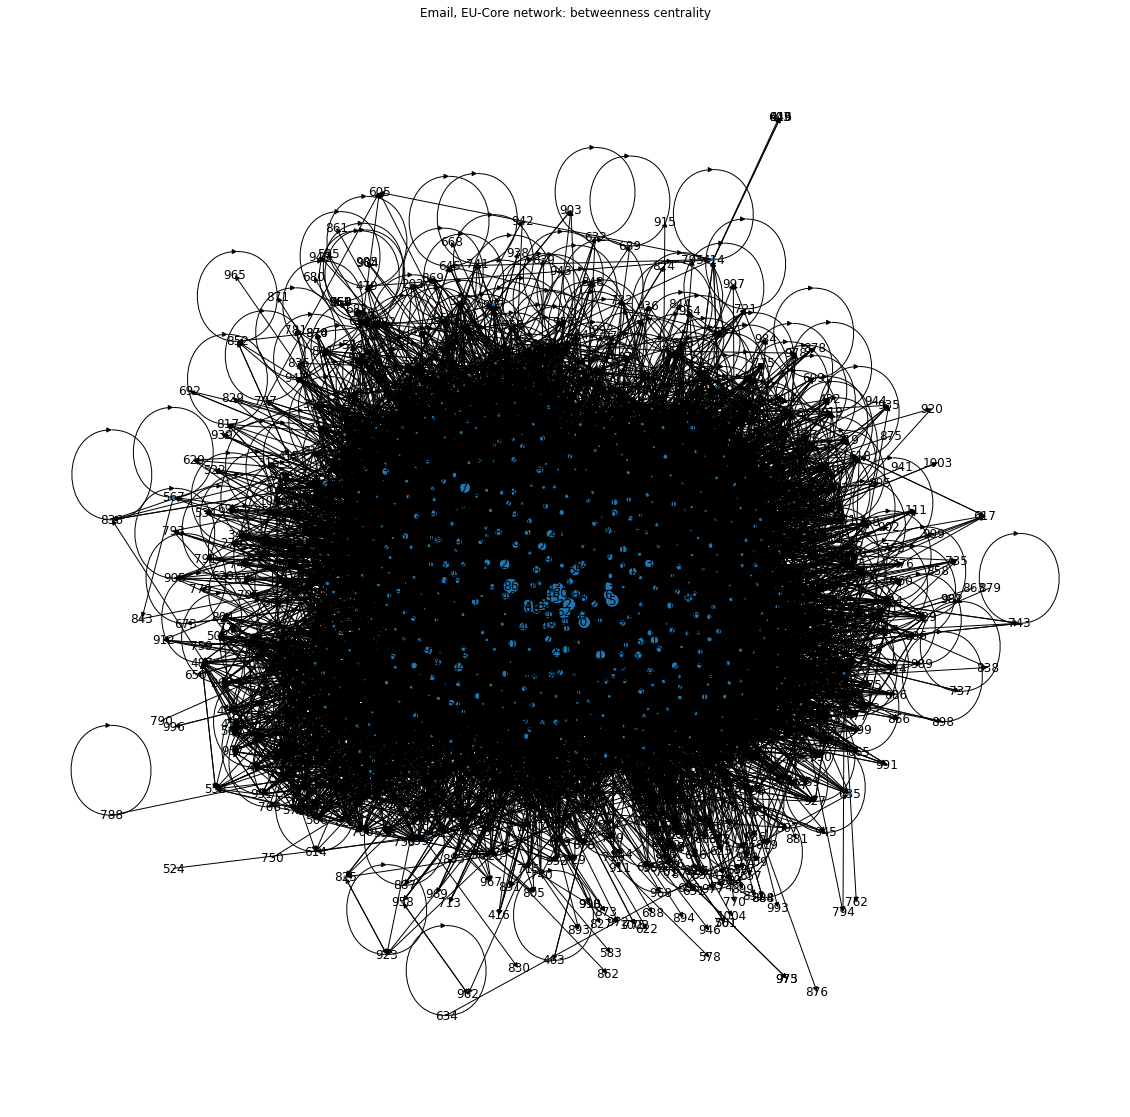

In [10]:
plt.subplots(figsize=(20,20))
plt.title('Email, EU-Core network: betweenness centrality')
nx.draw_kamada_kawai(G, with_labels=True, node_size=list(np.array(list(btw_centrality.values()))*5000))

In [11]:
#  Page rank (Eigenvector centrality)

In [12]:
ev_centrality = nx.algorithms.centrality.eigenvector_centrality(G)
for i, w in enumerate(sorted(ev_centrality.items(), key = lambda item:item[1], reverse = True)):
    if(i<10):
        print(w)
    else:
        break

(160, 0.14920830020770334)
(107, 0.1436550202500797)
(62, 0.1400842479033306)
(434, 0.1360605936203267)
(121, 0.13602431758544953)
(183, 0.12603117081397033)
(128, 0.12026720909903038)
(256, 0.11685068092507098)
(249, 0.11548957746114072)
(129, 0.11540966863212031)


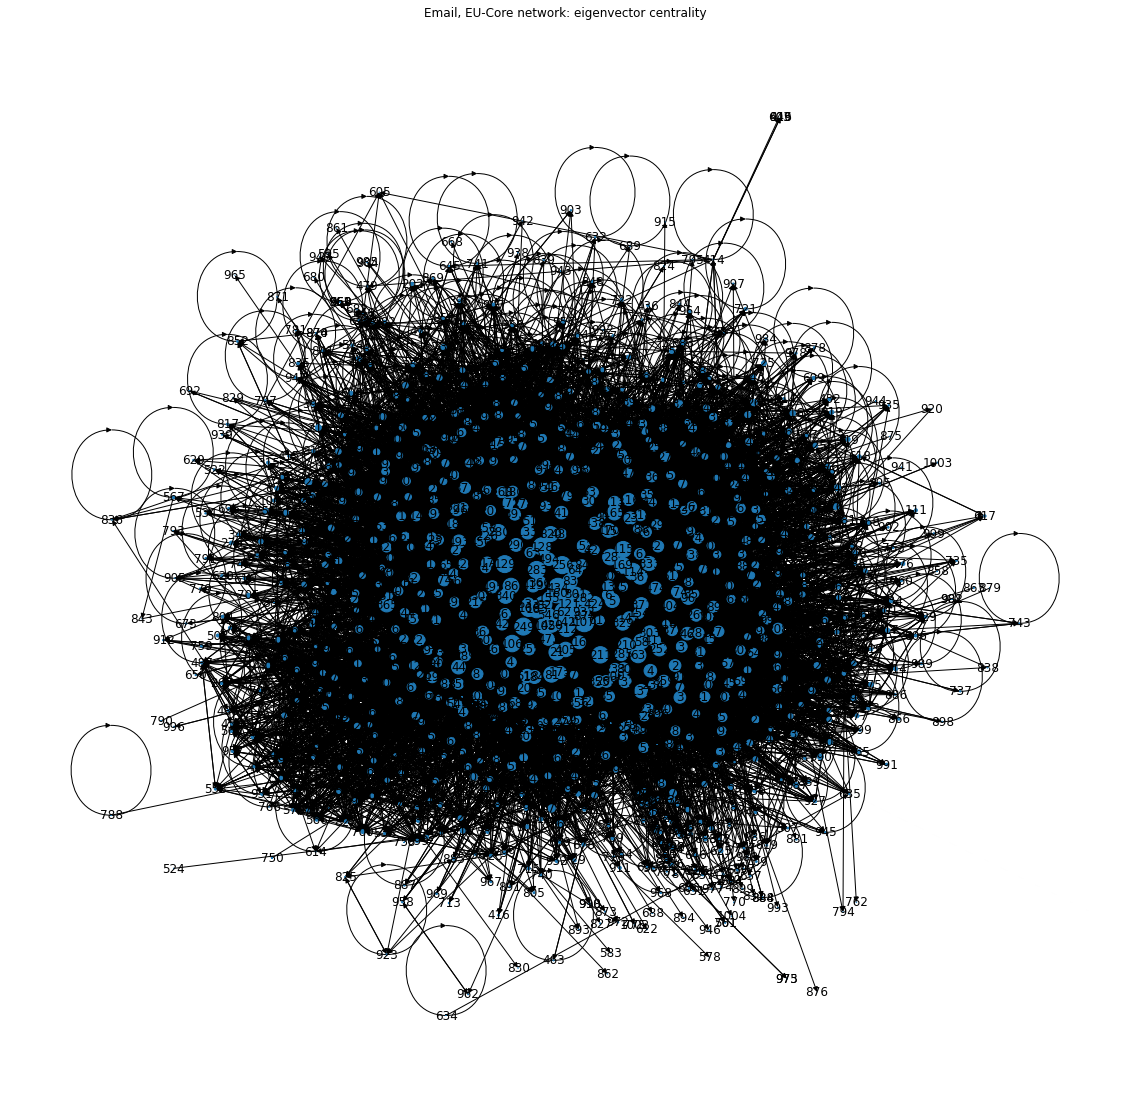

In [13]:
plt.subplots(figsize=(20,20))
plt.title('Email, EU-Core network: eigenvector centrality')
nx.draw_kamada_kawai(G, with_labels=True, node_size=list(np.array(list(ev_centrality.values()))*2500))

In [14]:
#Clustering coefficient

In [15]:
G_undir = nx.from_pandas_edgelist(df, source='Source', target = 'Target')
nx.algorithms.cluster.average_clustering(G_undir)

0.3993549664221539

In [16]:
# closeness centrality


In [17]:
ev_centrality = nx.algorithms.centrality.closeness_centrality(G)
for i, w in enumerate(sorted(ev_centrality.items(), key = lambda item:item[1], reverse = True)):
    if(i<10):
        print(w)
    else:
        break

(160, 0.4496688397114823)
(62, 0.4367960817756949)
(107, 0.43313263076725356)
(434, 0.42843368072064014)
(121, 0.42761501763646054)
(86, 0.423034390478414)
(64, 0.4214410406084389)
(129, 0.4190733943128858)
(183, 0.4185508589085057)
(128, 0.41725020366018833)


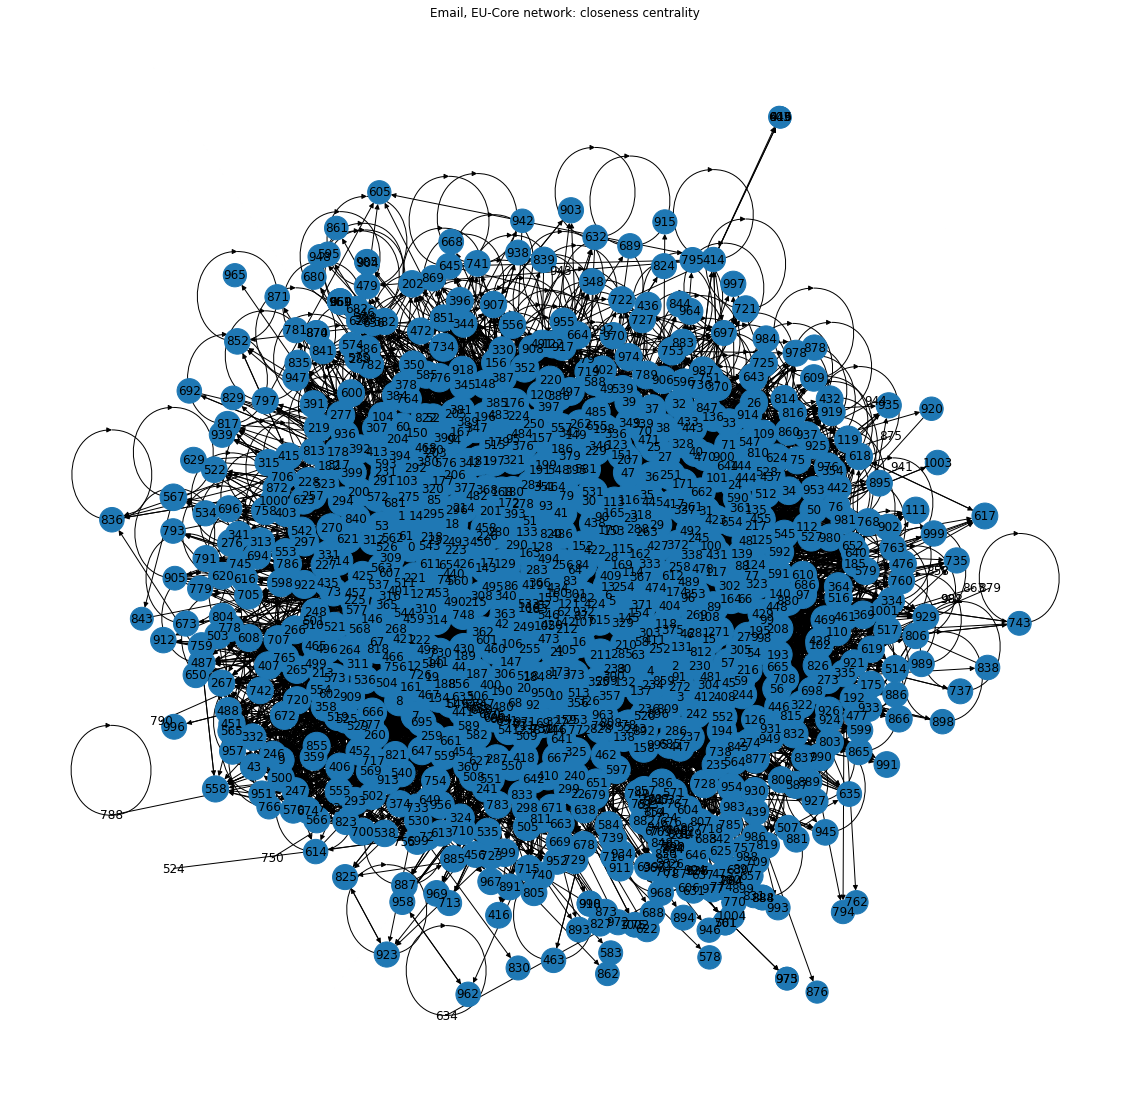

In [18]:
plt.subplots(figsize=(20,20))
plt.title('Email, EU-Core network: closeness centrality')
nx.draw_kamada_kawai(G, with_labels=True, node_size=list(np.array(list(ev_centrality.values()))*2500))